In [1]:
# IMPORT LIBRARY 

from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

# 随机森林, GBR, KNN, LR, Decision Tree, GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
rs = check_random_state(4421)

In [2]:
# 数据加载和转换
# 数据读取: 

data = pd.read_csv('games.csv')

In [3]:
data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [4]:
# 选择要用于预测模型的变量,表格的每一行包含一场比赛的胜利方和失败方
# 分为两个数据集(team1 和 team2), 每个数据集分别获取各自团队的数据
# Team 1 的数据: 
# winner: 

In [5]:
data.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","seasonId"],axis = 1,inplace = True)

In [8]:
Team1 = data[['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','winner']]
Team2 = data[['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills','winner']]

In [9]:
data

,gameId,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,3326086514,1504279457970,1949,1,2,1,1,1,1,2,...,4,14,4,4,3,5,0,0,1,1
1,3229566029,1497848803862,1851,1,1,1,1,0,1,1,...,4,4,14,4,7,2,0,0,0,0
2,3327363504,1504360103310,1493,1,2,1,1,1,2,0,...,12,4,11,7,4,2,0,0,1,0
3,3326856598,1504348503996,1758,1,1,1,1,1,1,0,...,3,4,14,4,7,0,0,0,0,0
4,3330080762,1504554410899,2094,1,2,1,1,1,1,0,...,4,4,12,4,7,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,2,1,2,2,0,2,0,...,7,3,4,11,4,10,2,0,4,0
51486,3215685759,1496957179355,3304,2,1,1,2,2,2,2,...,4,4,12,14,4,11,7,4,4,1
51487,3322765040,1504029863961,2156,2,2,2,2,0,1,0,...,4,12,4,14,4,10,2,0,2,0
51488,3256675373,1499562036246,1475,2,2,2,2,0,2,0,...,14,12,4,11,4,11,3,0,1,0


In [10]:
Team1.columns = ['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','towerKills' ,'inhibitorKills','baronKills','dragonKills','riftHeraldKills','winner']
Team2.columns = ['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','towerKills' ,'inhibitorKills','baronKills','dragonKills','riftHeraldKills','winner']
teams= pd.concat([Team1,Team2],axis=0)

In [11]:
teams

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,winner
0,1949,2,1,1,1,1,2,11,1,2,3,0,1
1,1851,1,1,1,0,1,1,10,4,0,2,1,1
2,1493,2,1,1,1,2,0,8,1,1,1,0,1
3,1758,1,1,1,1,1,0,9,2,1,2,0,1
4,2094,2,1,1,1,1,0,9,2,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,1,2,2,0,2,0,10,2,0,4,0,2
51486,3304,1,1,2,2,2,2,11,7,4,4,1,2
51487,2156,2,2,2,0,1,0,10,2,0,2,0,2
51488,1475,2,2,2,0,2,0,11,3,0,1,0,2


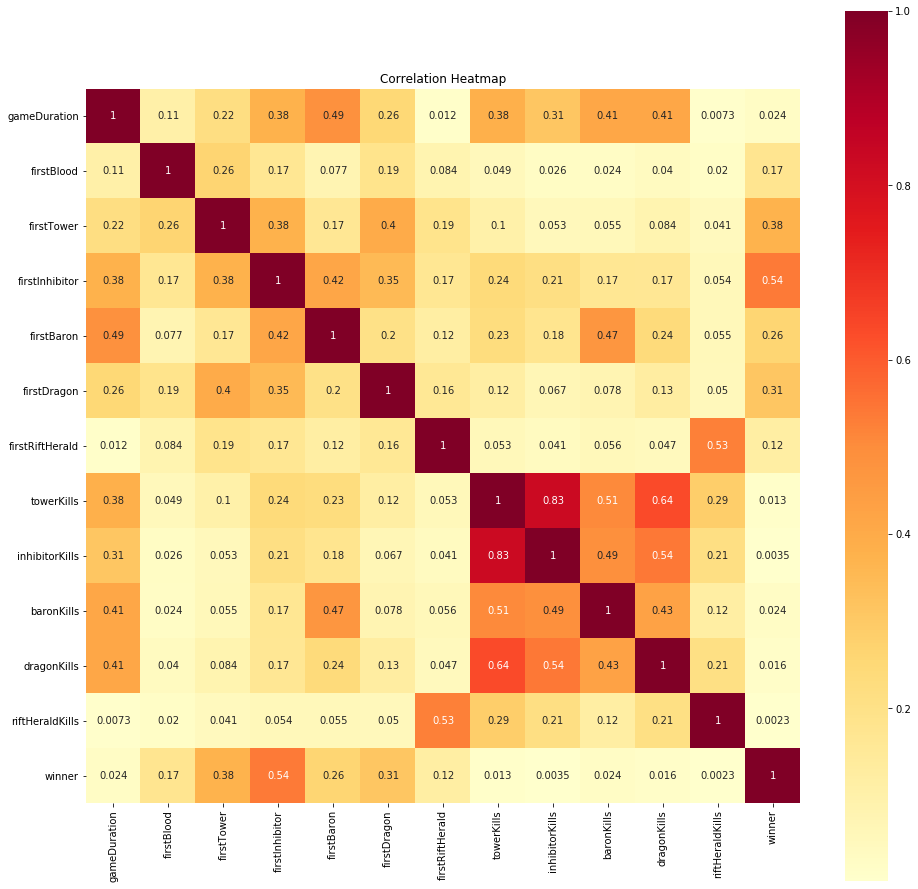

In [14]:
plt.figure(figsize=(16, 16))
plt.title('Correlation Heatmap')
sns.heatmap(teams.corr(), square=True, annot=True,cmap="YlOrRd")
plt.savefig('corr')

In [52]:
# modeling 

X = teams.drop(['winner'], axis=1)
Y = teams['winner']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=rs)

In [54]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [59]:
#SVM 

from sklearn.svm import SVC 

rbf = SVC(gamma=0.1)
rbf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
y_pred = rbf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Accuracy=", accuracy_test)

Accuracy= 0.8846377937463585


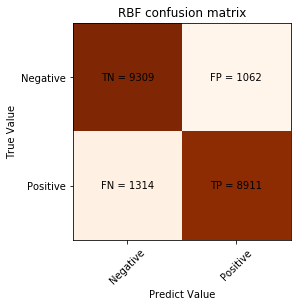

In [61]:
y_pred = y_pred.round()

confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('RBF confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')


In [65]:
# decision tree
range1 = range(2, 40)
range2 = range(1, 5)
score = 0
precision = []

for es1 in range1:
    for es2 in range2:
        dtree = DecisionTreeRegressor(random_state=rs, 
                                      min_samples_split=es1, 
                                      min_samples_leaf = es2)
        dtree.fit(X_train, y_train)
        prediction = dtree.predict(X_test)
        accuracy_test = accuracy_score(y_test, prediction.round())
        if(score < accuracy_test):
            y_pred = prediction
            score = accuracy_test
            pos1 = es1
            pos2 = es2
        precision.insert(es1, accuracy_test)

print("Precision: {0: .5f}".format(score))
print("max_samples_split: " +format(pos1))
print("min_samples_split: " +format(pos2))

Precision:  0.92921
max_samples_split: 39
min_samples_split: 4


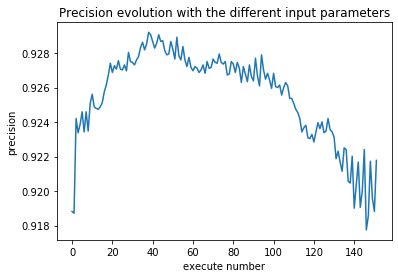

In [63]:
plt.title('Precision evolution with the different input parameters')
plt.ylabel('precision')
plt.xlabel('execute number')
plt.plot(precision)

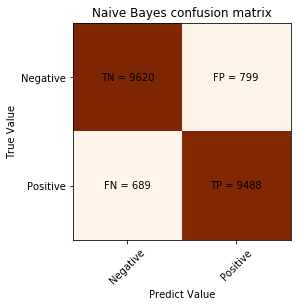

In [33]:
y_pred = y_pred.round()

confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('Decision Tree confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')



In [35]:
fpr[4], tpr[4], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[4] = auc(fpr[4], tpr[4])


In [22]:
# 朴素贝叶斯:
nb = GaussianNB()
nb.fit(X_train,y_train)
prediction = nb.predict(X_test)
accuracy_test = accuracy_score(y_test,prediction.round())
print( "Accuracy (test)  =", accuracy_test )

Accuracy (test)  = 0.8302097494659157


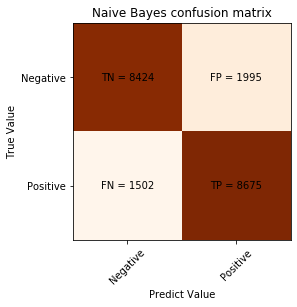

In [23]:
y_pred = nb.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('Naive Bayes confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')


#plt.savefig("KNN_con",dpi=200, bbox_inches='tight')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.84868   0.80852   0.82812     10419
           2    0.81303   0.85241   0.83225     10177

    accuracy                        0.83021     20596
   macro avg    0.83085   0.83047   0.83018     20596
weighted avg    0.83106   0.83021   0.83016     20596



In [27]:
#ROC 
fpr[3], tpr[3], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[3] = auc(fpr[3], tpr[3])

In [12]:
# KNN: 
score = 0
precision = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    accuracy_test = accuracy_score(y_test,prediction.round())
    if (score < accuracy_test):
        y_pred = prediction
        score = knn.score(X_test, y_test)
        pos = k
    precision.insert(k, knn.score(X_test, y_test))
    
print("precision: {0: .5f}".format(score))
print("n_neighbors:"+format(k))

precision:  0.82972
n_neighbors:29


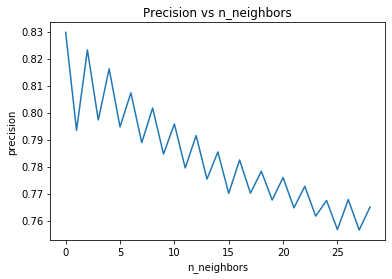

In [13]:
plt.title('Precision vs n_neighbors')
plt.ylabel('precision')
plt.xlabel('n_neighbors')
plt.plot(precision)

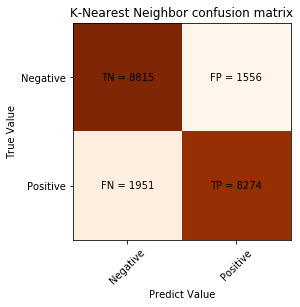

In [14]:
confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('K-Nearest Neighbor confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')


#plt.savefig("KNN_con",dpi=200, bbox_inches='tight')

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.81878   0.84997   0.83408     10371
           2    0.84171   0.80919   0.82513     10225

    accuracy                        0.82972     20596
   macro avg    0.83025   0.82958   0.82961     20596
weighted avg    0.83016   0.82972   0.82964     20596



In [17]:

fpr[1], tpr[1], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

In [18]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = lr.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Accuracy=", accuracy_test)

Accuracy= 0.814721305107788


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.78971   0.86144   0.82402     10371
           2    0.84520   0.76733   0.80439     10225

    accuracy                        0.81472     20596
   macro avg    0.81746   0.81439   0.81420     20596
weighted avg    0.81726   0.81472   0.81427     20596



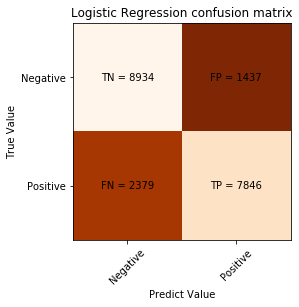

In [21]:
confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges_r)
classNames = ['Negative', 'Positive']
plt.title('Logistic Regression confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')

#plt.savefig("LR_con", dpi=200, bbox_inches='tight')


In [22]:
#ROC 
fpr[2], tpr[2], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[2] = auc(fpr[2], tpr[2])



In [1]:
plt.figure()
lw = 2

plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='Curva ROC k-Nearest Neighbor (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue', lw=lw, label='Curva ROC  Naive Bayes (area = %0.2f)' % roc_auc[2])


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'plt' is not defined